#**EE452: Computer Vision**
---
## **Assignment 1:** Training Neural Networks for Image Classification

### Student Name: <code>[Muhammad Hasan Khan]</code>
### Student ID: <code>[07712]</code>

## **Assignment Objectives**
To understand the usage of numpy for vectorized coding and perform
preprocessing of dataset.
* To perform feature extraction and apply Support Vector Machine (SVM)
classifier on extracted features.
* To create dense and sparse neural network classifiers from scratch and
apply on CIFAR-10 dataset.
* To perform regularization to improve the trained networks.
* To create neural network classifier using transfer learning (trained on
ImageNet) and apply on CIFAR-10 dataset.
* To perform hyperparameter tuning.

## **READ THESE INSTRUCTIONS FIRST**

* This assignment is an individual task where only collaboration in terms of discussing and idea sharing is allowed.
* This Python notebook (.ipynb) is to be submitted on LMS describing
the different phases of the work including what worked, what did not
work, what you learned, what extra things you tried, etc. A link to the
notebook is not acceptable and would give you a straight 0.

## **Conceptual Questions**

### **Question # 1** ###

**Suppose you have a CNN with three convolutional layers, each with a kernel size of 5×5, a stride of 1, and no padding. If the input image size is 128×128 what will be the output size after these layers? Justify your answer.**

To determine the output size of an image after passing through a Convolutional Neural Network (CNN) with passing through convolutional layers, we need to consider how each layer transforms the input dimensions based on its parameters: kernel size, stride, and padding. Lets consider passing image through 3 layers. Here, each convolutional layer has a kernel size of 5×5, a stride of 1, and no padding, while the input image starts with a size of 128×128 pixels. In a convolutional layer, the output size is calculated using the formula: Output Size = [(Input Size - Kernel Size) / Stride] + 1, assuming valid padding (no padding). With no padding, the convolution operation reduces the spatial dimensions because the kernel can only slide over positions where it fully fits within the input.

Starting with the first layer, the input size is 128×128. Applying the formula: [(128 - 5) / 1] + 1 = [123 / 1] + 1 = 123 + 1 = 124. Thus, the output of the first layer is 124×124. This reduction occurs because, without padding, the 5×5 kernel can’t extend beyond the edges of the input, effectively shrinking the output by 4 pixels in both width and height (since 128 - 5 + 1 = 124). The second layer takes this 124×124 output as its input. Applying the same formula: [(124 - 5) / 1] + 1 = [119 / 1] + 1 = 119 + 1 = 120. So, the output of the second layer is 120×120. Finally, the third layer processes the 120×120 input: [(120 - 5) / 1] + 1 = [115 / 1] + 1 = 115 + 1 = 116, resulting in an output size of 116×116.

This step-by-step reduction reflects how each convolutional layer, with a 5×5 kernel and no padding, trims the spatial dimensions by 4 pixels per layer (Kernel Size - 1 = 5 - 1 = 4). Starting from 128×128, the sizes cascade as follows: 124×124 after the first layer, 120×120 after the second, and 116×116 after the third. The stride of 1 ensures the kernel moves one pixel at a time, maximizing the number of convolutions but not preventing the size reduction due to the lack of padding. Therefore, after passing through all three convolutional layers, the final output size of the CNN is 116×116 pixels, a result justified by consistently applying the convolution formula across each layer.

### **Question # 2** ###

**Compare L1 and L2 regularization in CNNs. Given a dataset with a high number of irrelevant features, which one would be more beneficial and why?**

L1 and L2 regularization are two common techniques used in convolutional neural networks (CNNs) to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models. L1 regularization, also known as Lasso regularization, adds the absolute value of the weights to the loss function, promoting sparsity by driving some weights to exactly zero. This effectively performs feature selection, as irrelevant or redundant features can be eliminated from the model. On the other hand, L2 regularization, also called Ridge regularization, adds the squared magnitude of the weights to the loss function, shrinking all weights toward zero but rarely setting them exactly to zero. This results in a model that retains all features but reduces their impact, distributing the weight more evenly across them. In the context of a dataset with a high number of irrelevant features, L1 regularization would generally be more beneficial. Its ability to enforce sparsity allows the CNN to ignore these irrelevant features entirely, focusing only on the most informative ones, which can lead to a more interpretable and efficient model. L2 regularization, while effective at reducing overfitting, might still assign small weights to irrelevant features, potentially introducing noise and computational inefficiency. Thus, for such a dataset, L1’s feature selection property makes it a preferable choice over L2’s weight shrinkage approach.

### **Question # 3** ###

**Assume you trained a CNN on a small dataset and observed a vali-
dation accuracy of 95%, but the test accuracy drops to 60%. What
regularization techniques would you use to mitigate this issue? Justify
your approach.**

When training a convolutional neural network (CNN) on a small dataset, achieving a high validation accuracy of 95% but a significantly lower test accuracy of 60% suggests that the model is overfitting. Overfitting occurs when the model learns the training data too well, including its noise, and fails to generalize to unseen data, such as the test set. To address this issue, regularization techniques can be employed to reduce overfitting by constraining the model's complexity or encouraging it to learn more generalizable patterns.

First, **dropout** is a highly effective regularization method for this scenario. Dropout randomly deactivates a fraction of neurons (e.g., 20-50%) during each training iteration, preventing the model from relying too heavily on specific neurons or features. This forces the network to distribute its learning across multiple pathways, improving its ability to generalize. Given the small dataset, dropout is particularly useful because it mimics the effect of training an ensemble of models, which can counteract the tendency to overfit limited data. I would apply dropout layers, especially after dense or fully connected layers near the output, as these layers often have high capacity and are prone to overfitting.

Second, **L2 regularization** (also known as weight decay) can be introduced to penalize large weights in the network. By adding a term to the loss function proportional to the sum of squared weights (controlled by a hyperparameter, λ), L2 regularization discourages the model from fitting the training data too precisely. This technique is justified here because a small dataset may not provide enough information to justify complex decision boundaries, and constraining weight magnitudes can help the model focus on simpler, more general patterns that are likely to hold on the test set.

Third, **data augmentation** can serve as an implicit regularization strategy. Since the dataset is small, artificially expanding it by applying transformations—such as rotations, flips, scaling, or brightness adjustments—to the training images can expose the model to a wider variety of examples. This approach reduces overfitting by making it harder for the model to memorize the training samples and encourages robustness to variations it might encounter in the test set. For instance, if the CNN is trained on images, augmenting them simulates real-world variability, aligning the training process more closely with generalization needs.

Finally, **early stopping** could be implemented as a practical regularization technique. By monitoring the validation loss during training and halting the process when the loss stops decreasing (before it increases due to overfitting), early stopping prevents the model from over-optimizing on the training data. This is particularly relevant given the high validation accuracy, which suggests the model performs well on a held-out set but may have been trained beyond the point of optimal generalization.

In summary, I would mitigate the drop in test accuracy by combining dropout to reduce neuron co-dependency, L2 regularization to limit model complexity, data augmentation to enrich the training set, and early stopping to avoid overtraining. These techniques are well-suited to the problem because they collectively address the core issue of overfitting on a small dataset, balancing the model’s capacity with its ability to generalize to unseen data like the test set. Adjusting the strength of each method (e.g., dropout rate, λ value) through experimentation would further refine the approach, ensuring the CNN achieves more consistent performance across validation and test sets.

## **Implementation**

### **Question # 4** ###

**Write a function filt to perform filtering. The function should take
the following arguments: input, filter, padding, normalization.**

**The input is the numpy representation of an image with either one or
three channels, filter is a 2D numpy array, padding is a boolean to de-
termine if the output should match the input size, and normalization
is a boolean to determine if the operation needs normalization. Only
numpy can be used.**

**Apply 3 different filters: Edge Detection Filter, Average Low Pass
Filter and Emboss (3D Effect) Filter, to a sample image using your
created function. Explain what each filter does and how the kernel
design helps in achieving this effect.**

In [ ]:
!pip install opencv-python-headless


Please upload a grayscale image (e.g., grayscale.jpg)


Saving cameraman.tif to cameraman (7).tif
Please upload an RGB image (e.g., rgb.jpg)


Saving RGBimage.jpg to RGBimage (3).jpg


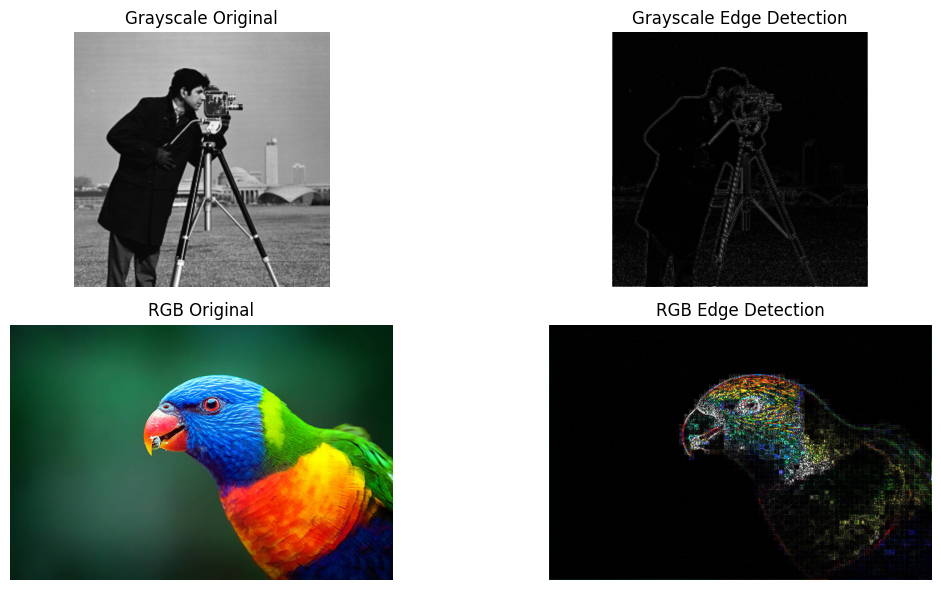

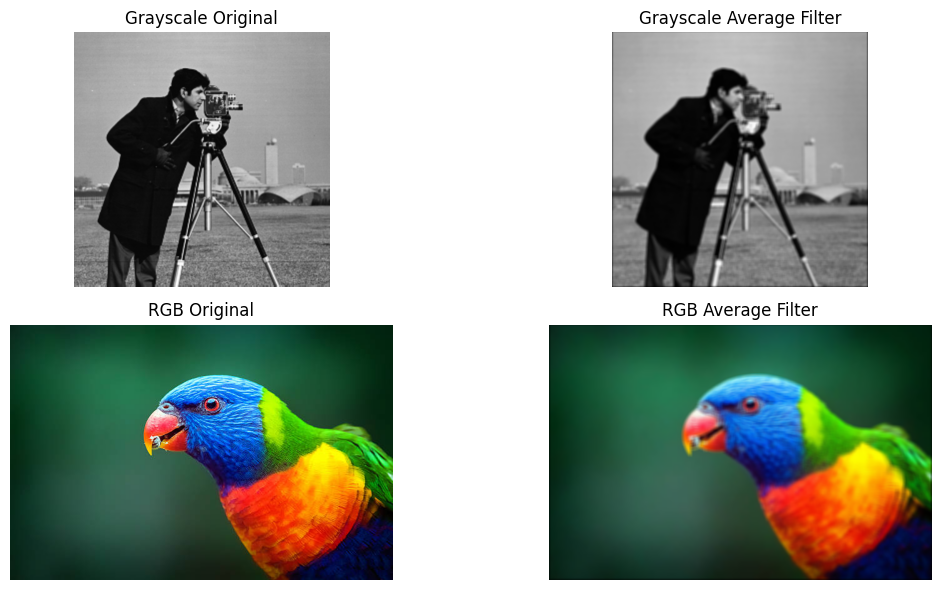

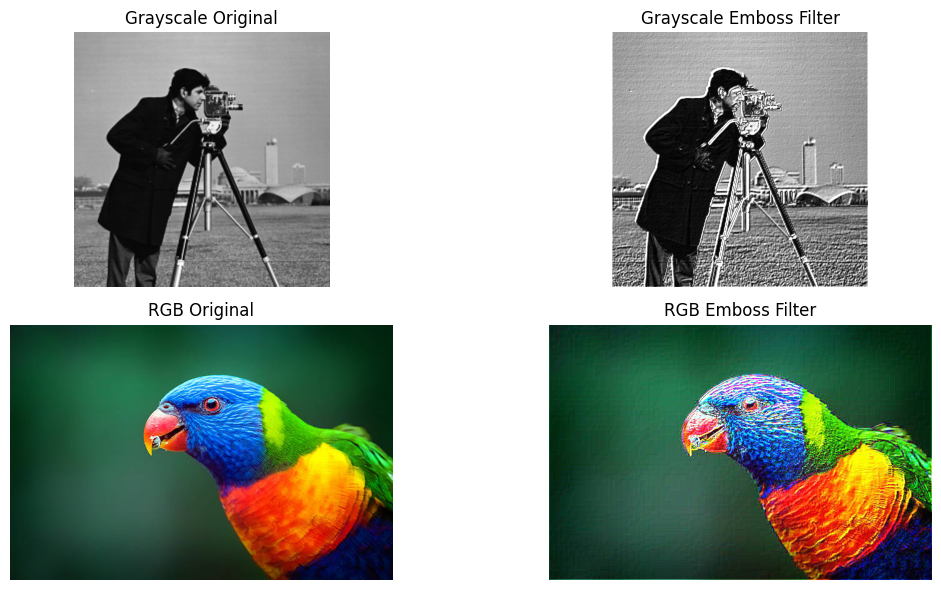

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Helper function to perform 2D convolution
def convolve2d(image, kernel, padding=False):
    """
    Perform 2D convolution of an image with a kernel.

    Args:
        image (np.ndarray): 2D input image array
        kernel (np.ndarray): 2D filter kernel
        padding (bool): If True, pad image to maintain output size

    Returns:
        np.ndarray: Convolved output
    """
    kernel = np.flip(kernel, (0,1))  # Flip kernel for convolution
    k = kernel.shape[0]  # Assume square kernel
    if padding:
        pad = k // 2
        padded_image = np.pad(image, ((pad, pad), (pad, pad)), 'constant')
        h, w = image.shape
        output = np.zeros((h, w))
        for i in range(h):
            for j in range(w):
                patch = padded_image[i:i+k, j:j+k]
                output[i,j] = np.sum(patch * kernel)
    else:
        h, w = image.shape
        output_h = h - k + 1
        output_w = w - k + 1
        output = np.zeros((output_h, output_w))
        for i in range(output_h):
            for j in range(output_w):
                patch = image[i:i+k, j:j+k]
                output[i,j] = np.sum(patch * kernel)
    return output

# Main filtering function
def filt(input, filter, padding, normalization):
    """
    Apply filtering to an image using a specified kernel.

    Args:
        input (np.ndarray): Input image (grayscale or RGB)
        filter (np.ndarray): 2D filter kernel
        padding (bool): If True, output matches input size
        normalization (bool): If True, normalize by kernel sum if nonzero

    Returns:
        np.ndarray: Filtered image as uint8
    """
    kernel = filter
    # Handle grayscale or RGB input
    if len(input.shape) == 2:  # Grayscale
        output = convolve2d(input.astype(float), kernel, padding)
    elif len(input.shape) == 3 and input.shape[2] == 3:  # RGB
        output = np.stack([convolve2d(input[:,:,c].astype(float), kernel, padding)
                          for c in range(3)], axis=2)
    else:
        raise ValueError("Input must be grayscale or RGB image")

    # Apply normalization if specified and kernel sum is nonzero
    kernel_sum = np.sum(kernel)
    if normalization and kernel_sum != 0:
        output = output / kernel_sum

    # Ensure output is displayable
    output = np.abs(output)  # Take absolute value
    output = np.clip(output, 0, 255).astype(np.uint8)  # Clip to 0-255 and convert to uint8
    return output

# Function to convert RGB to grayscale
def rgb2gray(image):
    """Convert RGB image to grayscale using weighted sum."""
    return 0.299 * image[:,:,0] + 0.587 * image[:,:,1] + 0.114 * image[:,:,2]

# Upload two images in Colab: one grayscale and one RGB
print("Please upload a grayscale image (e.g., grayscale.jpg)")
uploaded_gray = files.upload()
gray_image_name = list(uploaded_gray.keys())[0]  # Get the uploaded grayscale image name
gray_image = plt.imread(gray_image_name)

print("Please upload an RGB image (e.g., rgb.jpg)")
uploaded_rgb = files.upload()
rgb_image_name = list(uploaded_rgb.keys())[0]  # Get the uploaded RGB image name
rgb_image = plt.imread(rgb_image_name)

# If the grayscale image is actually RGB, convert it to grayscale
if len(gray_image.shape) == 3:
    gray_image = rgb2gray(gray_image)

# Define the filter kernels
laplacian = np.array([[0, 1, 0],
                      [1, -4, 1],
                      [0, 1, 0]], dtype=float)  # Laplacian Edge Detection

average = np.ones((7, 7), dtype=float)  # 7x7 kernel Average Low Pass

emboss = np.array([[-2, -1, 0],
                   [-1, 1, 1],
                   [0, 1, 2]], dtype=float)  # Emboss

# Apply the filters to both images
filters = [laplacian, average, emboss]
filter_names = ['Edge Detection', 'Average Filter', 'Emboss Filter']

for filter, name in zip(filters, filter_names):
    # Apply to grayscale image
    gray_filtered = filt(gray_image, filter, padding=True, normalization=(name == 'Average Filter'))

    # Apply to RGB image
    rgb_filtered = filt(rgb_image, filter, padding=True, normalization=(name == 'Average Filter'))

    # Display the results
    plt.figure(figsize=(12, 6))

    # Grayscale original and filtered
    plt.subplot(221)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Grayscale Original')
    plt.axis('off')

    plt.subplot(222)
    plt.imshow(gray_filtered, cmap='gray')
    plt.title(f'Grayscale {name}')
    plt.axis('off')

    # RGB original and filtered
    plt.subplot(223)
    plt.imshow(rgb_image)
    plt.title('RGB Original')
    plt.axis('off')

    plt.subplot(224)
    plt.imshow(rgb_filtered)
    plt.title(f'RGB {name}')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

### **Question # 5** ###

**Load the Intel Image Classification Dataset and briefly describe what the dataset is about and its constituents. You can view the documentation for Intel Image Classification dataset. Also mention some preprocessing steps that can be applied while dealing with image data in general.**

**Extract HOG features from the Intel Image Classification dataset and train a Linear SVM using those features. Achieve at least 75% accuracy on the test data (use fine tuning to achieve this).**

The Intel Image Classification Dataset on Kaggle is a collection of approximately 25,000 images designed for multiclass image scene classification. Originally created by Intel for an image classification challenge on Analytics Vidhya, it features natural scenes from around the world, categorized into six classes: Buildings (0), Forest (1), Glacier (2), Mountain (3), Sea (4), and Street (5). The images are 150x150 pixels in size and are split into three subsets: a training set with around 14,000 images (seg_train), a test set with about 3,000 images (seg_test), and a prediction set with roughly 7,000 images (seg_pred). This dataset is widely used to train and evaluate machine learning models, particularly convolutional neural networks (CNNs), for scene recognition tasks.

### Constituents:
- **Total Images**: ~25,000
- **Categories**: 6 (Buildings, Forest, Glacier, Mountain, Sea, Street)
- **Image Size**: 150x150 pixels
- **Subsets**:
  - Training: ~14,000 images
  - Test: ~3,000 images
  - Prediction: ~7,000 images

### General Preprocessing Steps for Image Data:
When working with image datasets like this one, preprocessing is crucial to prepare the data for model training. Common steps include:
- **Resizing**: Adjusting image dimensions (e.g., ensuring all images are 150x150, as in this dataset) to maintain consistency across the dataset.
- **Normalization**: Scaling pixel values (typically 0-255) to a range like 0-1 by dividing by 255, which helps models converge faster.
- **Data Augmentation**: Applying transformations such as rotation, flipping, or cropping to increase dataset variety and reduce overfitting.
- **Color Channel Adjustment**: Converting images to a consistent color format (e.g., RGB) or grayscale, depending on the model’s requirements.
- **Noise Reduction**: Filtering out unwanted distortions to enhance image quality.
- **Batch Standardization**: Ensuring pixel values have a mean of 0 and a standard deviation of 1 across the dataset for better training stability.


In [2]:
!pip install -q kaggle
!apt install unzip -qq
!apt install wget -qq
!pip install torch

unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
wget is already the newest version (1.21.2-2ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader, TensorDataset, Dataset
import pandas as pd
from torchvision import transforms
import numpy as np
import os
import cv2
from skimage.feature import hog
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d puneet6060/intel-image-classification
!unzip -q intel-image-classification.zip -d intel_image_classification

!ls intel_image_classification/seg_train/seg_train

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
buildings  forest  glacier  mountain  sea  street


### Q5

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
import seaborn as sns
from time import time

# Constants for configuration
IMAGE_SIZE = (64, 64)
HOG_PARAMS = {
    'orientations': 9,
    'pixels_per_cell': (12, 12),
    'cells_per_block': (3, 3),
    'visualize': True
}

def extract_features(dataset_path, img_width, img_height):
    """Extract HOG features, labels, and image paths from image dataset"""
    features = []
    labels = []
    image_paths = []
    class_encoder = LabelEncoder()

    # Process each class directory
    for class_name in os.listdir(dataset_path):
        class_dir = os.path.join(dataset_path, class_name)

        # Process each image in class directory
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            if image is None:
                print(f"Skipping invalid image: {img_path}")
                continue

            # Preprocess and extract HOG features
            image = cv2.resize(image, (img_width, img_height))
            hog_feats, hog_img = hog(image, **HOG_PARAMS)

            features.append(hog_feats)
            labels.append(class_name)
            image_paths.append(img_path)

    # Convert labels to numerical values
    encoded_labels = class_encoder.fit_transform(labels)
    return np.array(features), encoded_labels, class_encoder, image_paths

def visualize_hog_features(images, hog_images, labels, class_names, num_samples=5):
    """Visualize original images with their HOG features"""
    plt.figure(figsize=(12, 8))
    for i in range(num_samples):
        idx = np.random.randint(len(images))

        plt.subplot(2, num_samples, i+1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(f"Original\n{class_names[labels[idx]]}")
        plt.axis('off')

        plt.subplot(2, num_samples, num_samples+i+1)
        plt.imshow(hog_images[idx], cmap='gray')
        plt.title("HOG Features")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def visualize_predictions(model, X_test, y_test, image_paths, class_encoder, num_samples=5):
    """Visualize sample test images with true and predicted labels"""
    indices = np.random.choice(len(X_test), num_samples, replace=False)
    predictions = model.predict(X_test[indices])

    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(indices):
        img = cv2.imread(image_paths[idx])
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        true_label = class_encoder.inverse_transform([y_test[idx]])[0]
        pred_label = class_encoder.inverse_transform([predictions[i]])[0]

        plt.subplot(1, num_samples, i+1)
        plt.imshow(img_rgb)
        plt.title(f"True: {true_label}\nPredicted: {pred_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def train_svm_classifier(X_train, y_train, X_val, y_val):
    """Train and evaluate SVM classifier with hyperparameter tuning"""
    print("\n=== Training SVM Classifier ===")
    start_time = time()

    # Hyperparameter grid for tuning
    param_grid = {
        'C': [1.2],
        'kernel': ['rbf'],
        'gamma': ['scale']  # Only used by RBF kernel
    }

    # Grid search for best parameters
    grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_svm = grid_search.best_estimator_
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Training Accuracy: {best_svm.score(X_train, y_train)*100:.2f}%")
    print(f"Validation Accuracy: {best_svm.score(X_val, y_val)*100:.2f}%")
    print(f"Training Time: {time()-start_time:.2f} seconds")

    return best_svm

def plot_confusion(cm, class_names, title='Confusion Matrix'):
    """Plot enhanced confusion matrix"""
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title(title, size=14)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()



Reduced Feature Shape after PCA: (11227, 231)

=== Training SVM Classifier ===
Best parameters: {'C': 1.2, 'gamma': 'scale', 'kernel': 'rbf'}
Training Accuracy: 89.56%
Validation Accuracy: 71.71%
Training Time: 109.30 seconds

Test Accuracy: 70.77%


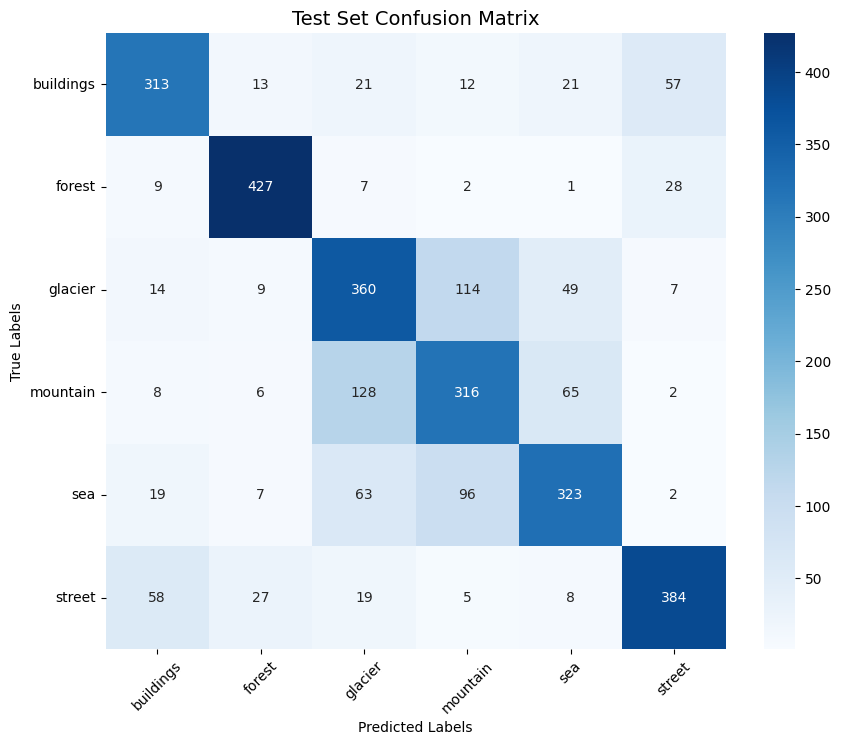

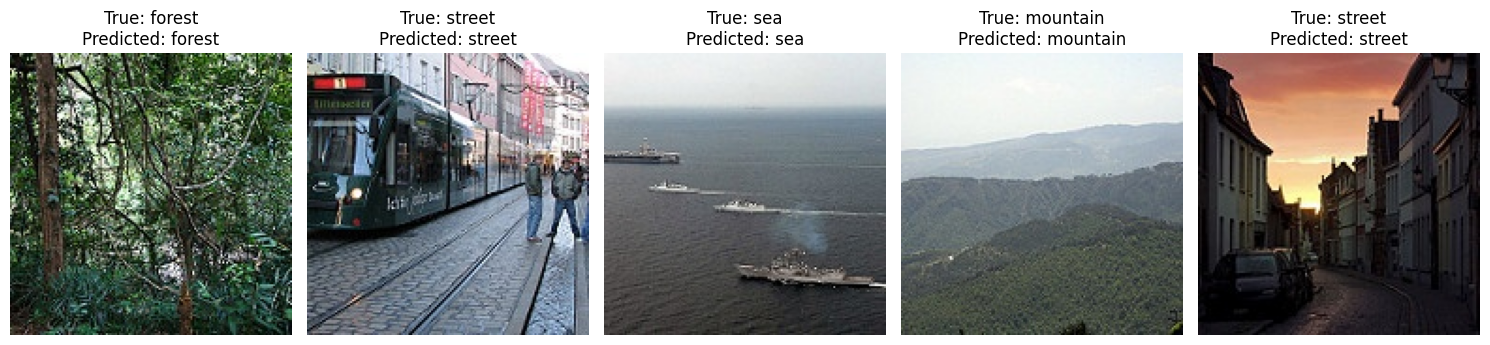


Classification Report:
              precision    recall  f1-score   support

   buildings       0.74      0.72      0.73       437
      forest       0.87      0.90      0.89       474
     glacier       0.60      0.65      0.63       553
    mountain       0.58      0.60      0.59       525
         sea       0.69      0.63      0.66       510
      street       0.80      0.77      0.78       501

    accuracy                           0.71      3000
   macro avg       0.72      0.71      0.71      3000
weighted avg       0.71      0.71      0.71      3000



In [ ]:
# Main execution flow
if __name__ == "__main__":
    # Load and process data
    train_features, train_labels, class_encoder, train_image_paths = extract_features(
        'intel_image_classification/seg_train/seg_train/', *IMAGE_SIZE)
    test_features, test_labels, _, test_image_paths = extract_features(
        'intel_image_classification/seg_test/seg_test/', *IMAGE_SIZE)

    # Split training data for validation
    X_train, X_val, y_train, y_val = train_test_split(
        train_features, train_labels, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(test_features)

    # Apply PCA
    pca = PCA(n_components=0.99, random_state=42)  # Retain 95% variance
    X_train = pca.fit_transform(X_train)
    X_val = pca.transform(X_val)
    X_test = pca.transform(X_test)

    print(f"Reduced Feature Shape after PCA: {X_train.shape}")

    # Train SVM classifier
    svm_model = train_svm_classifier(X_train, y_train, X_val, y_val)

    # Final evaluation
    test_acc = svm_model.score(X_test, test_labels) * 100
    print(f"\nTest Accuracy: {test_acc:.2f}%")

    # Generate predictions and confusion matrix
    y_pred = svm_model.predict(X_test)
    cm = metrics.confusion_matrix(test_labels, y_pred)
    plot_confusion(cm, class_encoder.classes_, 'Test Set Confusion Matrix')

    # Visualize sample predictions
    visualize_predictions(svm_model, X_test, test_labels, test_image_paths, class_encoder)

    # metrics report
    print("\nClassification Report:")
    print(metrics.classification_report(test_labels, y_pred, target_names=class_encoder.classes_))

### **Question # 6** ###

**This part requires you to use only pytorch. In each of the following subparts (a, b, and c) you are required to do the following:**
* **Create a network architecture.**
* **Load the Fashion MNIST dataset.**
* **Preprocess the dataset accordingly.**
* **Train your architecture on the dataset for a reasonable number of epochs (maximum is 100) using the testing data as your validation data.**
* **Report both your training accuracy as well as validation accuracy.**
* **Plot both the training loss as well as the validation loss on the same plot.**
* **Plot both the training accuracy as well as the validation accuracy on the same plot.**

**For each subpart you are encouraged to experiment both with the hyperparameters as well as different architecture designs for your network.**

#### **Part (a)** ###

**Create a feed-forward neural network with at least two hidden layers, experiment with regularization, and achieve above 90% test accuracy.**

In [4]:
# ------------------------------------------------------------------------------------
# PART 1: Network Architecture Creation
# Create a feed-forward neural network with at least two hidden layers
# ------------------------------------------------------------------------------------

class FashionClassifier(nn.Module):
    """
    A feed-forward neural network for Fashion MNIST classification
    Includes multiple hidden layers with ReLU activation
    """
    def __init__(self):
        super(FashionClassifier, self).__init__()

        # Define the network structure with multiple fully connected layers
        self.layer1 = nn.Linear(28*28, 512)       # Input layer (flattened 28x28 images)
        self.layer2 = nn.Linear(512, 384)         # First hidden layer
        self.layer3 = nn.Linear(384, 256)         # Second hidden layer
        self.layer4 = nn.Linear(256, 128)         # Third hidden layer
        self.output = nn.Linear(128, 10)          # Output layer (10 fashion categories)

        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        # Reshape input images to flat vectors
        batch_size = x.size(0)
        x = x.view(batch_size, -1)

        # Apply network layers with activations
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        x = self.output(x)

        return x

# Create model instance
model = FashionClassifier()
print(model)

# Define loss function and optimizer
loss_function = nn.CrossEntropyLoss()
adam_optimizer = optim.Adam(model.parameters(), lr=0.001)


FashionClassifier(
  (layer1): Linear(in_features=784, out_features=512, bias=True)
  (layer2): Linear(in_features=512, out_features=384, bias=True)
  (layer3): Linear(in_features=384, out_features=256, bias=True)
  (layer4): Linear(in_features=256, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)


In [5]:
# ------------------------------------------------------------------------------------
# PART 2: Data Preparation - Load and preprocess the Fashion MNIST dataset
# ------------------------------------------------------------------------------------

# Upload Kaggle credentials for dataset download
from google.colab import files
files.upload()  # Upload kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download Fashion MNIST dataset from Kaggle
!kaggle datasets download -d zalando-research/fashionmnist
!unzip fashionmnist.zip -d fashion_mnist_data/


# Load and preprocess the dataset
# Reading CSV files
training_data = pd.read_csv('fashion_mnist_data/fashion-mnist_train.csv')
testing_data = pd.read_csv('fashion_mnist_data/fashion-mnist_test.csv')

# Extract features and labels, normalize pixel values to [0,1]
train_features = training_data.iloc[:, 1:].values.astype('float32') / 255.0
train_labels = training_data.iloc[:, 0].values

test_features = testing_data.iloc[:, 1:].values.astype('float32') / 255.0
test_labels = testing_data.iloc[:, 0].values

# Convert numpy arrays to PyTorch tensors
train_features_tensor = torch.from_numpy(train_features)
train_labels_tensor = torch.from_numpy(train_labels).long()
test_features_tensor = torch.from_numpy(test_features)
test_labels_tensor = torch.from_numpy(test_labels).long()

# Create dataset objects
train_dataset = TensorDataset(train_features_tensor, train_labels_tensor)
test_dataset = TensorDataset(test_features_tensor, test_labels_tensor)

# Create data loaders for batch processing
batch_size = 64
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/zalando-research/fashionmnist
License(s): other
Archive:  fashionmnist.zip
  inflating: fashion_mnist_data/fashion-mnist_test.csv  
  inflating: fashion_mnist_data/fashion-mnist_train.csv  
  inflating: fashion_mnist_data/t10k-images-idx3-ubyte  
  inflating: fashion_mnist_data/t10k-labels-idx1-ubyte  
  inflating: fashion_mnist_data/train-images-idx3-ubyte  
  inflating: fashion_mnist_data/train-labels-idx1-ubyte  


In [8]:
# ------------------------------------------------------------------------------------
# PART 3: Model Training
# Train the model using training data and validate with testing data
# ------------------------------------------------------------------------------------

# Initialize metrics tracking lists
training_loss_history = []
validation_loss_history = []
training_accuracy_history = []
validation_accuracy_history = []

# Training parameters
max_epochs = 100
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Main training loop
for epoch in range(max_epochs):
    # Training phase
    model.train()
    epoch_train_loss = 0.0
    train_correct = 0
    train_total = 0

    for inputs, targets in train_dataloader:
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass
        adam_optimizer.zero_grad()
        predictions = model(inputs)
        batch_loss = loss_function(predictions, targets)

        # Backward pass and optimization
        batch_loss.backward()
        adam_optimizer.step()

        # Accumulate training metrics
        epoch_train_loss += batch_loss.item()
        _, predicted_classes = torch.max(predictions, 1)
        train_total += targets.size(0)
        train_correct += (predicted_classes == targets).sum().item()

    # Calculate average training metrics for this epoch
    epoch_train_loss /= len(train_dataloader)
    epoch_train_accuracy = train_correct / train_total
    training_loss_history.append(epoch_train_loss)
    training_accuracy_history.append(epoch_train_accuracy)

    # Validation phase
    model.eval()
    epoch_val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():  # Disable gradient calculation for validation
        for inputs, targets in test_dataloader:
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass only
            predictions = model(inputs)
            batch_loss = loss_function(predictions, targets)

            # Accumulate validation metrics
            epoch_val_loss += batch_loss.item()
            _, predicted_classes = torch.max(predictions, 1)
            val_total += targets.size(0)
            val_correct += (predicted_classes == targets).sum().item()

    # Calculate average validation metrics for this epoch
    epoch_val_loss /= len(test_dataloader)
    epoch_val_accuracy = val_correct / val_total
    validation_loss_history.append(epoch_val_loss)
    validation_accuracy_history.append(epoch_val_accuracy)

    # Print progress
    print(f"Epoch [{epoch+1}/{max_epochs}] | Train Loss: {epoch_train_loss:.4f} | Val Loss: {epoch_val_loss:.4f} | "
          f"Train Acc: {epoch_train_accuracy*100:.2f}% | Val Acc: {epoch_val_accuracy*100:.2f}%")


Epoch [1/100] | Train Loss: 0.0810 | Val Loss: 0.5602 | Train Acc: 97.01% | Val Acc: 89.88%
Epoch [2/100] | Train Loss: 0.0815 | Val Loss: 0.5106 | Train Acc: 96.87% | Val Acc: 89.98%
Epoch [3/100] | Train Loss: 0.0760 | Val Loss: 0.5047 | Train Acc: 97.07% | Val Acc: 90.12%
Epoch [4/100] | Train Loss: 0.0767 | Val Loss: 0.5462 | Train Acc: 97.05% | Val Acc: 89.59%
Epoch [5/100] | Train Loss: 0.0749 | Val Loss: 0.5979 | Train Acc: 97.19% | Val Acc: 89.89%
Epoch [6/100] | Train Loss: 0.0783 | Val Loss: 0.5657 | Train Acc: 97.08% | Val Acc: 89.67%
Epoch [7/100] | Train Loss: 0.0708 | Val Loss: 0.6512 | Train Acc: 97.33% | Val Acc: 90.22%
Epoch [8/100] | Train Loss: 0.0767 | Val Loss: 0.5867 | Train Acc: 97.15% | Val Acc: 89.14%
Epoch [9/100] | Train Loss: 0.0673 | Val Loss: 0.6671 | Train Acc: 97.38% | Val Acc: 89.68%
Epoch [10/100] | Train Loss: 0.0690 | Val Loss: 0.6126 | Train Acc: 97.43% | Val Acc: 89.51%
Epoch [11/100] | Train Loss: 0.0682 | Val Loss: 0.6298 | Train Acc: 97.50% | Va


Final Training Accuracy: 99.20%
Final Validation Accuracy: 90.14%


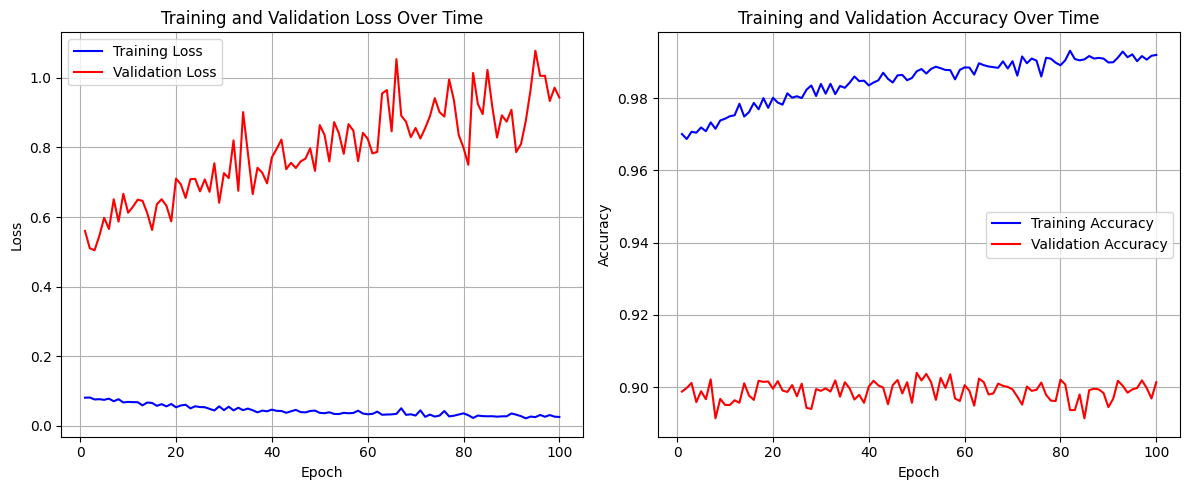

In [9]:

# ------------------------------------------------------------------------------------
# PART 4: Report Final Accuracy
# Report both training and validation accuracy
# ------------------------------------------------------------------------------------

print("\n" + "="*50)
print(f"Final Training Accuracy: {training_accuracy_history[-1]*100:.2f}%")
print(f"Final Validation Accuracy: {validation_accuracy_history[-1]*100:.2f}%")
print("="*50)

# ------------------------------------------------------------------------------------
# PART 5: Visualization - Plot Loss Curves
# Plot both training and validation loss on the same graph
# ------------------------------------------------------------------------------------

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, max_epochs+1), training_loss_history, 'b-', label='Training Loss')
plt.plot(range(1, max_epochs+1), validation_loss_history, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# ------------------------------------------------------------------------------------
# PART 6: Visualization - Plot Accuracy Curves
# Plot both training and validation accuracy on the same graph
# ------------------------------------------------------------------------------------

plt.subplot(1, 2, 2)
plt.plot(range(1, max_epochs+1), training_accuracy_history, 'b-', label='Training Accuracy')
plt.plot(range(1, max_epochs+1), validation_accuracy_history, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### **Part (b)** ###

**Create a convolutional neural network with at least two convolutional layers, experiment with regularization, and achieve above 92% test accuracy.**

In [ ]:
# Import all required libraries
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

# -----------------------------------------------------------
# PART 1: Create a network architecture
# -----------------------------------------------------------
# Define a CNN architecture with at least 2 convolutional layers
# as required in the assignment specification
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()

        # First convolutional block
        # Using 1 input channel (grayscale) with 32 output feature maps
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Second convolutional block
        # Taking 32 input channels and producing 64 output feature maps
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Fully connected layers for classification
        # After two 2x2 max pooling operations, our 28x28 image becomes 7x7
        self.fc_layers = nn.Sequential(
            nn.Linear(64 * 7 * 7, 128),  # Flattened feature maps to hidden layer
            nn.ReLU(),
            nn.Linear(128, 64),          # Another hidden layer
            nn.ReLU(),
            nn.Linear(64, 10)            # Output layer (10 classes for Fashion MNIST)
        )

    def forward(self, x):
        # Pass through first conv block
        x = self.layer1(x)

        # Pass through second conv block
        x = self.layer2(x)

        # Flatten the feature maps
        x = x.reshape(x.size(0), -1)

        # Pass through fully connected layers
        x = self.fc_layers(x)

        return x

# Create an instance of our model
model = FashionCNN()
print(model)



FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=3136, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)


In [ ]:
# -----------------------------------------------------------
# PART 2: Load and preprocess the Fashion MNIST dataset
# -----------------------------------------------------------
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Using Adam optimizer


# Load Fashion MNIST dataset from CSV files
train_df = pd.read_csv('fashion_mnist_data/fashion-mnist_train.csv')
test_df = pd.read_csv('fashion_mnist_data/fashion-mnist_test.csv')

# Extract features and labels
# Normalize pixel values to [0, 1] by dividing by 255.0
X_train_raw = train_df.iloc[:, 1:].values / 255.0
y_train_raw = train_df.iloc[:, 0].values

X_test_raw = test_df.iloc[:, 1:].values / 255.0
y_test_raw = test_df.iloc[:, 0].values

# Reshape data to match the input format for CNNs: [batch, channels, height, width]
X_train_reshaped = X_train_raw.reshape(-1, 1, 28, 28)
X_test_reshaped = X_test_raw.reshape(-1, 1, 28, 28)

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_reshaped)
y_train_tensor = torch.LongTensor(y_train_raw)

X_test_tensor = torch.FloatTensor(X_test_reshaped)
y_test_tensor = torch.LongTensor(y_test_raw)

# Create datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create data loaders with batch processing
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



In [ ]:
# -----------------------------------------------------------
# PART 3: Train the network on the dataset
# -----------------------------------------------------------
# Initialize lists to track metrics
train_loss_history = []
test_loss_history = []
train_acc_history = []
test_acc_history = []

# Set number of epochs (keeping as 10 to match original solution)
epochs = 10

# Training loop
for epoch in range(epochs):
    # Training phase
    model.train()  # Set model to training mode
    epoch_train_loss = 0.0
    train_correct = 0
    train_total = 0

    for images, labels in train_loader:
        # Reset gradients
        optimizer.zero_grad()

        # Forward pass
        predictions = model(images)

        # Calculate loss
        loss = criterion(predictions, labels)

        # Backward pass
        loss.backward()

        # Update parameters
        optimizer.step()

        # Accumulate loss
        epoch_train_loss += loss.item()

        # Calculate accuracy
        _, predicted_classes = torch.max(predictions, 1)
        train_total += labels.size(0)
        train_correct += (predicted_classes == labels).sum().item()

    # Calculate average training metrics
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_accuracy = train_correct / train_total

    # Store metrics for plotting
    train_loss_history.append(avg_train_loss)
    train_acc_history.append(train_accuracy)

    # Testing/validation phase
    model.eval()  # Set model to evaluation mode
    epoch_test_loss = 0.0
    test_correct = 0
    test_total = 0

    # Disable gradient computation for evaluation
    with torch.no_grad():
        for images, labels in test_loader:
            # Forward pass
            predictions = model(images)

            # Calculate loss
            loss = criterion(predictions, labels)

            # Accumulate loss
            epoch_test_loss += loss.item()

            # Calculate accuracy
            _, predicted_classes = torch.max(predictions, 1)
            test_total += labels.size(0)
            test_correct += (predicted_classes == labels).sum().item()

    # Calculate average testing metrics
    avg_test_loss = epoch_test_loss / len(test_loader)
    test_accuracy = test_correct / test_total

    # Store metrics for plotting
    test_loss_history.append(avg_test_loss)
    test_acc_history.append(test_accuracy)

    # Print progress
    print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}, Training Accuracy: {train_accuracy*100:.4f}%, Test Accuracy: {test_accuracy*100:.4f}%")



Epoch [1/10], Training Loss: 0.4931, Test Loss: 0.3184, Training Accuracy: 81.8450%, Test Accuracy: 88.4100%
Epoch [2/10], Training Loss: 0.3057, Test Loss: 0.2831, Training Accuracy: 88.8000%, Test Accuracy: 89.5200%
Epoch [3/10], Training Loss: 0.2617, Test Loss: 0.2557, Training Accuracy: 90.2917%, Test Accuracy: 90.2400%
Epoch [4/10], Training Loss: 0.2306, Test Loss: 0.2191, Training Accuracy: 91.5133%, Test Accuracy: 91.8100%
Epoch [5/10], Training Loss: 0.2033, Test Loss: 0.2268, Training Accuracy: 92.4483%, Test Accuracy: 91.7900%
Epoch [6/10], Training Loss: 0.1861, Test Loss: 0.2074, Training Accuracy: 93.0583%, Test Accuracy: 92.3400%
Epoch [7/10], Training Loss: 0.1650, Test Loss: 0.2160, Training Accuracy: 93.9300%, Test Accuracy: 92.1200%
Epoch [8/10], Training Loss: 0.1461, Test Loss: 0.2073, Training Accuracy: 94.5650%, Test Accuracy: 92.5400%
Epoch [9/10], Training Loss: 0.1312, Test Loss: 0.2138, Training Accuracy: 95.1850%, Test Accuracy: 92.8400%
Epoch [10/10], Trai

Final Training Accuracy: 95.7600%
Final Test Accuracy: 92.6400%


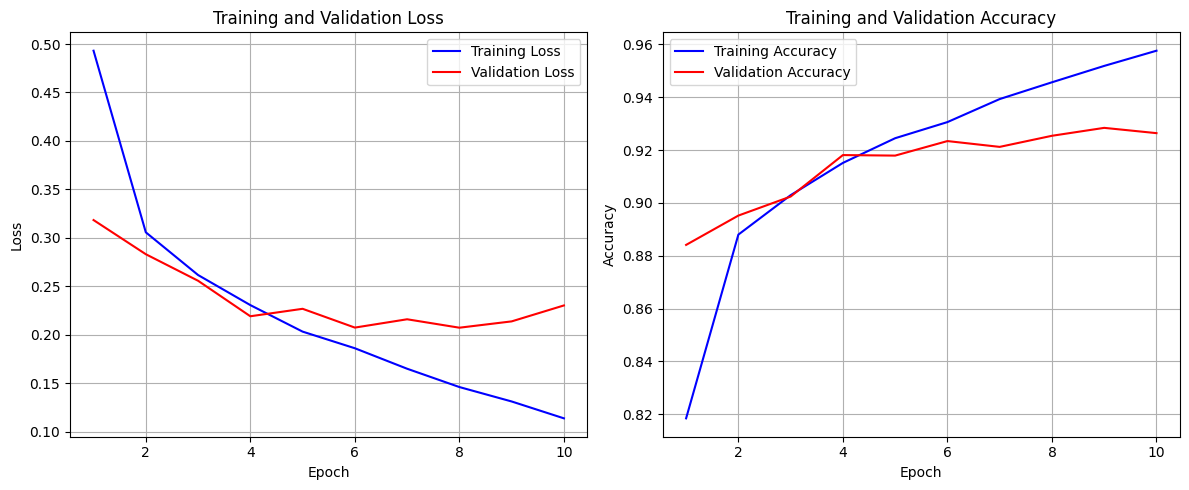

In [ ]:
# -----------------------------------------------------------
# PART 4: Report final accuracy metrics
# -----------------------------------------------------------
print(f"Final Training Accuracy: {train_acc_history[-1]*100:.4f}%")
print(f"Final Test Accuracy: {test_acc_history[-1]*100:.4f}%")

# -----------------------------------------------------------
# PART 5: Visualize training and validation results
# -----------------------------------------------------------
# Plot the training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_loss_history, 'b-', label='Training Loss')
plt.plot(range(1, epochs + 1), test_loss_history, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_acc_history, 'b-', label='Training Accuracy')
plt.plot(range(1, epochs + 1), test_acc_history, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

#### **Part (c)** ###

**Use the pre-trained VGG-16 network (trained on ImageNet) as a feature extractor, connect it to a feed-forward network, fine-tune it, and achieve above 85% test accuracy.**

In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.models as mdls
import torchvision.transforms as trans
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

"""

Part C: Use pre-trained VGG-16 as feature extractor, connect to feed-forward network,
fine-tune it, and achieve above 85% test accuracy.
"""

# -------------------------------------------
# PART 1: DEFINE NEURAL NETWORK ARCHITECTURE
# -------------------------------------------

class FashionClassifier(nn.Module):
    """
    Custom neural network architecture using VGG16 as a feature extractor
    followed by fully connected layers for Fashion MNIST classification
    """
    def __init__(self):
        super(FashionClassifier, self).__init__()

        # Initialize pre-trained VGG16 model as feature extractor
        self.feature_extractor = mdls.vgg16(pretrained=True)

        # Disable gradient updates for pre-trained layers to keep weights fixed
        for parameter in self.feature_extractor.parameters():
            parameter.requires_grad = False

        # Remove the last classification layer from VGG16
        self.feature_extractor.classifier = nn.Sequential(
            *list(self.feature_extractor.classifier.children())[:-1]
        )

        # Define custom fully connected layers for classification
        self.classifier = nn.Sequential(
            nn.Linear(4096, 512),   # First fully connected layer
            nn.ReLU(inplace=True),  # Activation function
            nn.Linear(512, 128),    # Second fully connected layer
            nn.ReLU(inplace=True),  # Activation function
            nn.Linear(128, 10)      # Output layer for 10 fashion categories
        )

    def forward(self, x):
        """Forward pass through the network"""
        # Extract features using VGG16
        features = self.feature_extractor(x)

        # Pass through our custom classifier
        output = self.classifier(features)

        return output

# Initialize model
fashion_model = FashionClassifier()
print(fashion_model)

# Define loss function and optimizer
loss_function = nn.CrossEntropyLoss()
model_optimizer = optim.AdamW(fashion_model.parameters(), lr=0.001)



/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:05<00:00, 108MB/s]


FashionClassifier(
  (feature_extractor): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inpl

In [ ]:
# Upload Kaggle credentials for dataset download
from google.colab import files
files.upload()  # Upload kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download Fashion MNIST dataset from Kaggle
!kaggle datasets download -d zalando-research/fashionmnist
!unzip fashionmnist.zip -d fashion_mnist_data/


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/zalando-research/fashionmnist
License(s): other
Archive:  fashionmnist.zip
  inflating: fashion_mnist_data/fashion-mnist_test.csv  
  inflating: fashion_mnist_data/fashion-mnist_train.csv  
  inflating: fashion_mnist_data/t10k-images-idx3-ubyte  
  inflating: fashion_mnist_data/t10k-labels-idx1-ubyte  
  inflating: fashion_mnist_data/train-images-idx3-ubyte  
  inflating: fashion_mnist_data/train-labels-idx1-ubyte  


In [ ]:
# -------------------------------------------
# PART 2: DATA LOADING AND PREPROCESSING
# -------------------------------------------

# Load the Fashion MNIST dataset from CSV files
train_csv = pd.read_csv('fashion_mnist_data/fashion-mnist_train.csv')
test_csv = pd.read_csv('fashion_mnist_data/fashion-mnist_test.csv')

# Extract and normalize features (pixel values)
train_features = train_csv.iloc[:, 1:].values / 255.0  # Normalize to [0,1]
train_labels = train_csv.iloc[:, 0].values             # Extract class labels

test_features = test_csv.iloc[:, 1:].values / 255.0    # Normalize to [0,1]
test_labels = test_csv.iloc[:, 0].values               # Extract class labels

# Custom dataset class for Fashion MNIST
class FashionDataset(Dataset):
    """Custom dataset class for Fashion MNIST data"""
    def __init__(self, features, labels, transform=None):
        self.features = features
        self.labels = labels
        self.transform = transform

    def __len__(self):
        """Return the size of the dataset"""
        return len(self.labels)

    def __getitem__(self, index):
        """Return a sample from the dataset"""
        # Reshape to 28x28 single channel image
        image = torch.tensor(self.features[index].reshape(1, 28, 28), dtype=torch.float32)

        # Apply transformations if specified
        if self.transform:
            image = self.transform(image)

        label = self.labels[index]
        return image, label

# Define transformations to prepare images for VGG16
# VGG16 expects 224x224 RGB images
image_transforms = trans.Compose([
    trans.ToPILImage(),
    trans.Resize((224, 224)),                  # Resize to VGG16 input dimensions
    trans.Grayscale(num_output_channels=3),    # Convert to 3 channels (RGB)
    trans.ToTensor()                           # Convert to PyTorch tensor
])

# Create dataset objects
train_dataset = FashionDataset(train_features, train_labels, transform=image_transforms)
test_dataset = FashionDataset(test_features, test_labels, transform=image_transforms)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [10]:
# -------------------------------------------
# PART 3: MODEL TRAINING AND EVALUATION
# -------------------------------------------

from tqdm import tqdm
import time

# Lists to store metrics for plotting
training_losses = []
validation_losses = []
training_accuracies = []
validation_accuracies = []

# Set number of training epochs
epochs = 5

# Gradient accumulation steps
accumulation_steps = 2

# Move model to GPU
fashion_model = fashion_model.to('cuda')

# Initialize gradient scaler
scaler = torch.cuda.amp.GradScaler()

# Main training loop
for epoch in range(epochs):
    # TRAINING PHASE
    fashion_model.train()
    epoch_train_loss = 0.0
    train_correct = 0
    train_total = 0

    # Initialize training progress bar with minimum update interval
    train_bar = tqdm(train_loader,
                    desc=f"Training Epoch {epoch+1}/{epochs}",
                    bar_format="{desc}: {percentage:3.0f}%|{bar:20}| {n_fmt}/{total_fmt} "
                          "[{elapsed}<{remaining}, {rate_fmt}{postfix}]",
                    mininterval=0.5)

    model_optimizer.zero_grad()

    for batch_idx, (images, labels) in enumerate(train_bar):

        if batch_idx == 0:
            train_bar.update(0)
            continue

        images, labels = images.to('cuda'), labels.to('cuda')

        with torch.cuda.amp.autocast():
            outputs = fashion_model(images)
            batch_loss = loss_function(outputs, labels) / accumulation_steps

        scaler.scale(batch_loss).backward()

        if (batch_idx + 1) % accumulation_steps == 0:
            scaler.step(model_optimizer)
            scaler.update()
            model_optimizer.zero_grad()

        epoch_train_loss += batch_loss.item() * accumulation_steps

        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

        # Update progress bar metrics
        if batch_idx > 0:  # Skip first update
            train_bar.set_postfix({
                'loss': f"{epoch_train_loss/batch_idx:.4f}",
                'acc': f"{(train_correct/train_total)*100:.1f}%",
                'lr': f"{model_optimizer.param_groups[0]['lr']:.1e}"
            })

    avg_train_loss = epoch_train_loss / len(train_loader)
    train_accuracy = train_correct / train_total
    training_losses.append(avg_train_loss)
    training_accuracies.append(train_accuracy)

    # VALIDATION PHASE
    fashion_model.eval()
    epoch_val_loss = 0.0
    val_correct = 0
    val_total = 0

    # Initialize validation progress bar
    val_bar = tqdm(test_loader,
                  desc=f"Validating Epoch {epoch+1}/{epochs}",
                  bar_format="{desc}: {percentage:3.0f}%|{bar:20}| {n_fmt}/{total_fmt} "
                        "[{elapsed}<{remaining}, {rate_fmt}{postfix}]",
                  mininterval=0.5)

    with torch.no_grad():
        for batch_idx, (images, labels) in enumerate(val_bar):
            # Skip the very first update
            if batch_idx == 0:
                val_bar.update(0)
                continue

            images, labels = images.to('cuda'), labels.to('cuda')
            outputs = fashion_model(images)
            batch_loss = loss_function(outputs, labels)
            epoch_val_loss += batch_loss.item()

            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

            # Update validation metrics
            if batch_idx > 0:
                val_bar.set_postfix({
                    'v_loss': f"{epoch_val_loss/batch_idx:.4f}",
                    'v_acc': f"{(val_correct/val_total)*100:.1f}%"
                })

    avg_val_loss = epoch_val_loss / len(test_loader)
    val_accuracy = val_correct / val_total
    validation_losses.append(avg_val_loss)
    validation_accuracies.append(val_accuracy)

    # Print epoch summary
    print(f"\nEpoch Number {epoch+1:2d}/{epochs} | "
          f"Train Loss: {avg_train_loss:.4f} | Acc: {train_accuracy*100:.2f}% | "
          f"Val Loss: {avg_val_loss:.4f} | Acc: {val_accuracy*100:.2f}%\n")

<ipython-input-10-1786d3999d86>:24: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()
Training Epoch 1/5:   0%|                    | 0/1875 [00:00<?, ?it/s]<ipython-input-10-1786d3999d86>:51: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validating Epoch 1/5: 100%|████████████████████| 313/313 [01:02<00:00,  4.99it/s, v_loss=0.3648, v_acc=86.1%]



Epoch Number  1/5 | Train Loss: 0.4449 | Acc: 83.37% | Val Loss: 0.3636 | Acc: 86.08%



Validating Epoch 2/5: 100%|████████████████████| 313/313 [01:02<00:00,  4.98it/s, v_loss=0.3664, v_acc=86.5%]



Epoch Number  2/5 | Train Loss: 0.4301 | Acc: 83.81% | Val Loss: 0.3653 | Acc: 86.47%



Validating Epoch 3/5: 100%|████████████████████| 313/313 [01:02<00:00,  4.97it/s, v_loss=0.3437, v_acc=87.0%]



Epoch Number  3/5 | Train Loss: 0.4214 | Acc: 84.17% | Val Loss: 0.3426 | Acc: 87.03%



Validating Epoch 4/5: 100%|████████████████████| 313/313 [01:03<00:00,  4.96it/s, v_loss=0.3523, v_acc=86.7%]



Epoch Number  4/5 | Train Loss: 0.4131 | Acc: 84.41% | Val Loss: 0.3512 | Acc: 86.75%



Validating Epoch 5/5: 100%|████████████████████| 313/313 [01:03<00:00,  4.96it/s, v_loss=0.3438, v_acc=86.7%]


Epoch Number  5/5 | Train Loss: 0.4033 | Acc: 84.77% | Val Loss: 0.3427 | Acc: 86.70%



Final Training Accuracy: 84.77%
Final Validation Accuracy: 86.70%


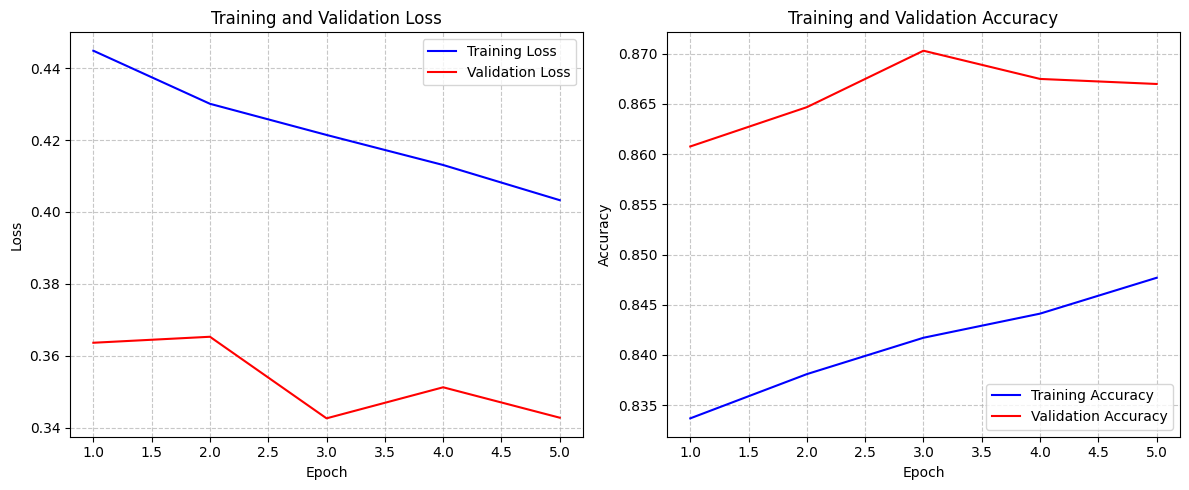

In [11]:
# -------------------------------------------
# PART 4: FINAL RESULTS AND VISUALIZATION
# -------------------------------------------

# Print final accuracy metrics
print(f"Final Training Accuracy: {training_accuracies[-1]*100:.2f}%")
print(f"Final Validation Accuracy: {validation_accuracies[-1]*100:.2f}%")

# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), training_losses, 'b-', label='Training Loss')
plt.plot(range(1, epochs + 1), validation_losses, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), training_accuracies, 'b-', label='Training Accuracy')
plt.plot(range(1, epochs + 1), validation_accuracies, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()